In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
data = pd.read_csv("/content/student_data.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [127]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [128]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [129]:
num_cols = data.select_dtypes(include=['number']).columns
num_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

**Data Visualization**

**Categorical Data Analysis**

In [130]:
categorical_columns = data.select_dtypes(include=['object']).columns
lenght = len(categorical_columns)
lenght

17

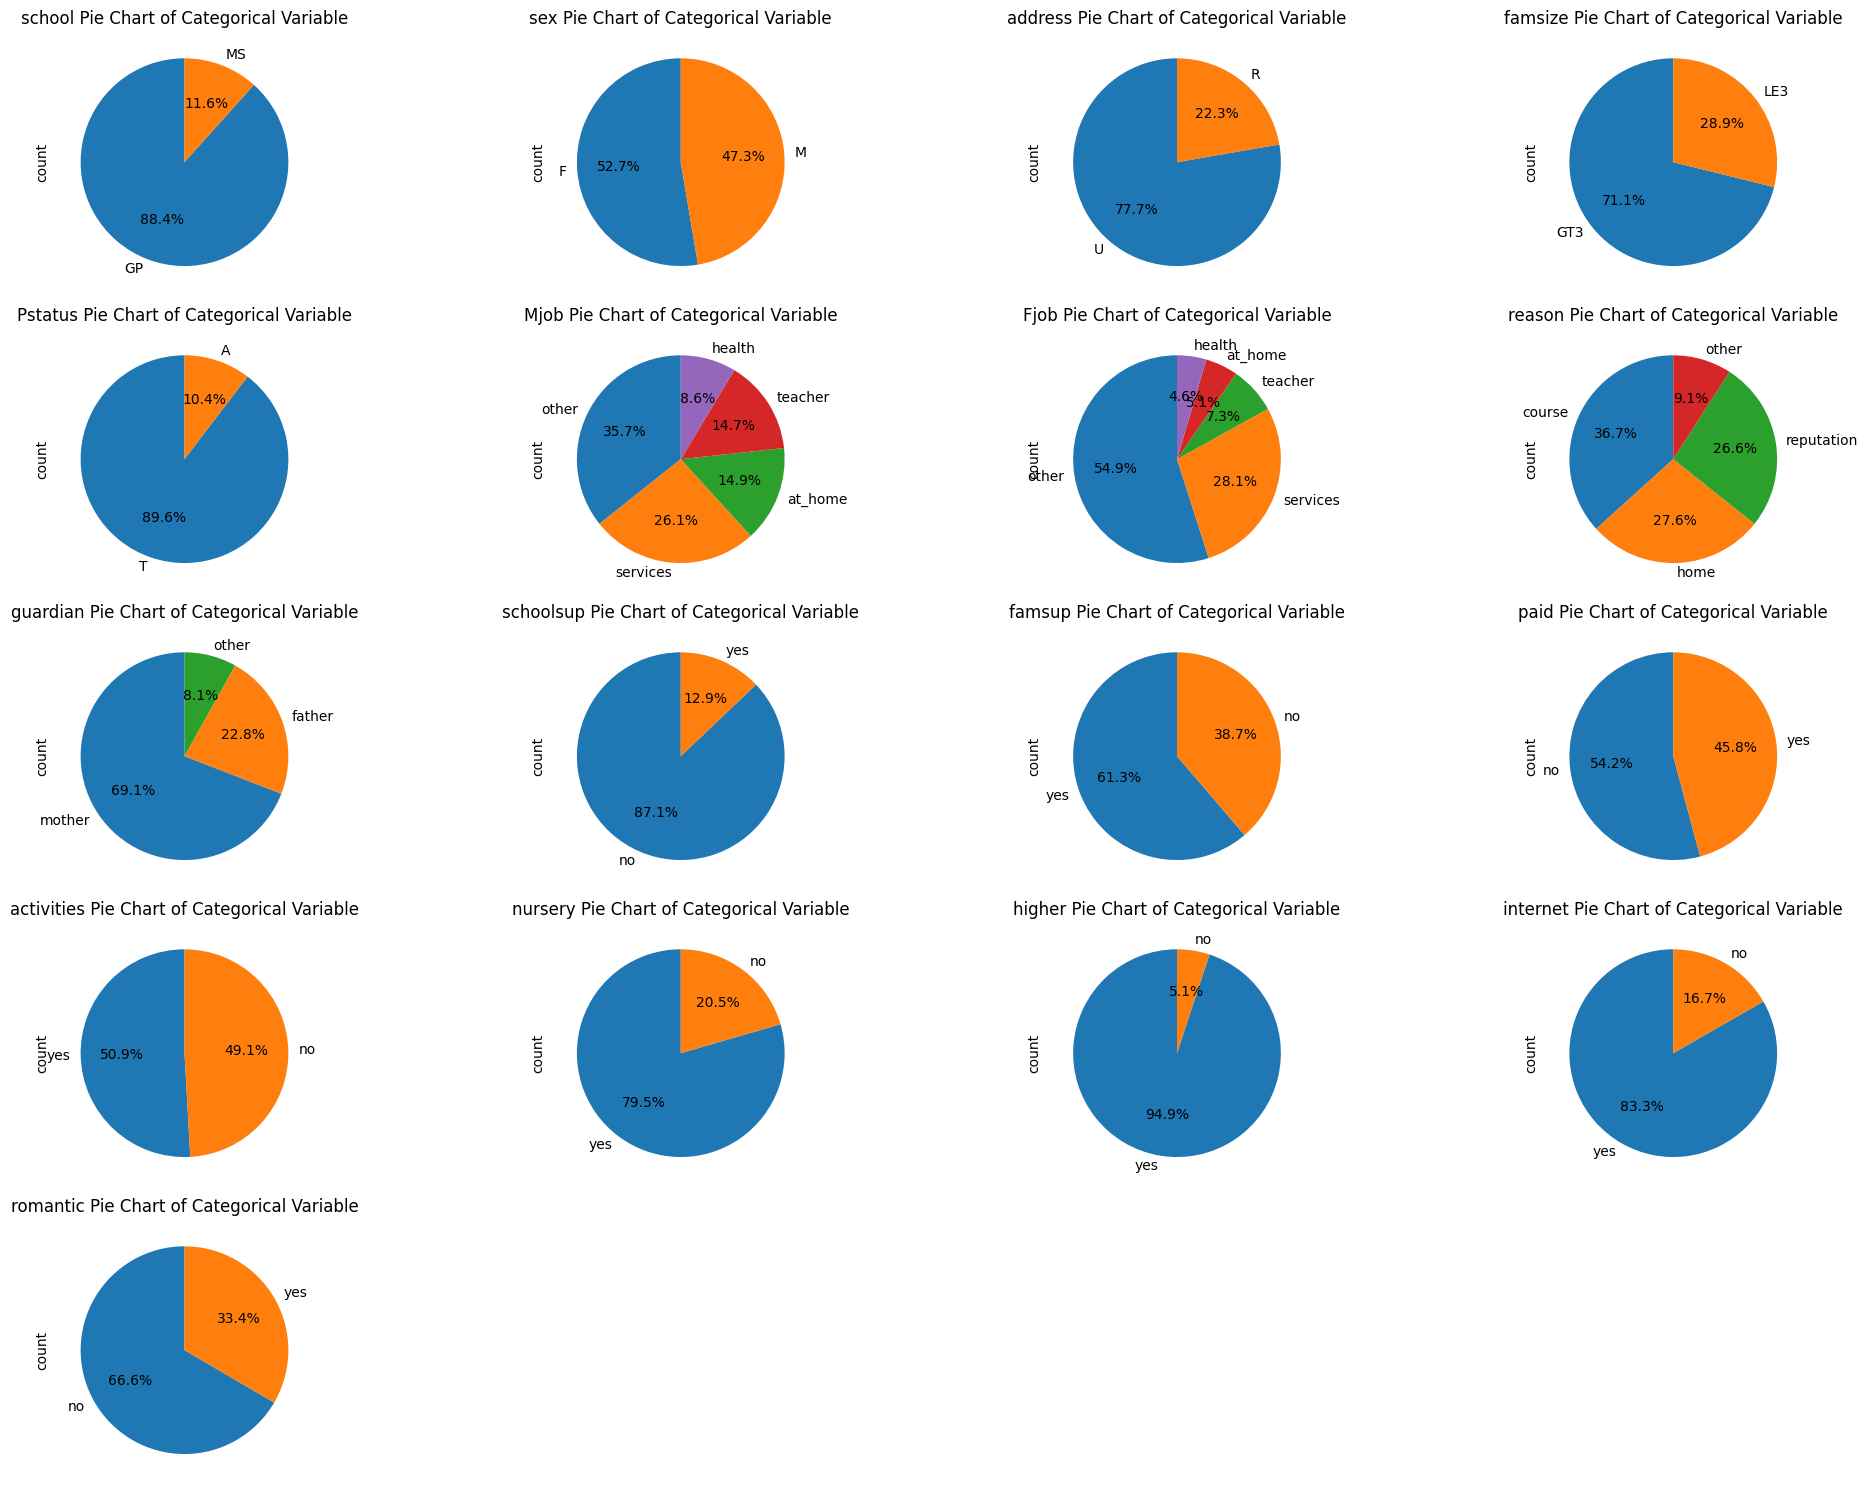

In [131]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(5, 4, i)
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'{col} Pie Chart of Categorical Variable')

plt.tight_layout()
plt.show()

**Numerical Data Analysis**

age


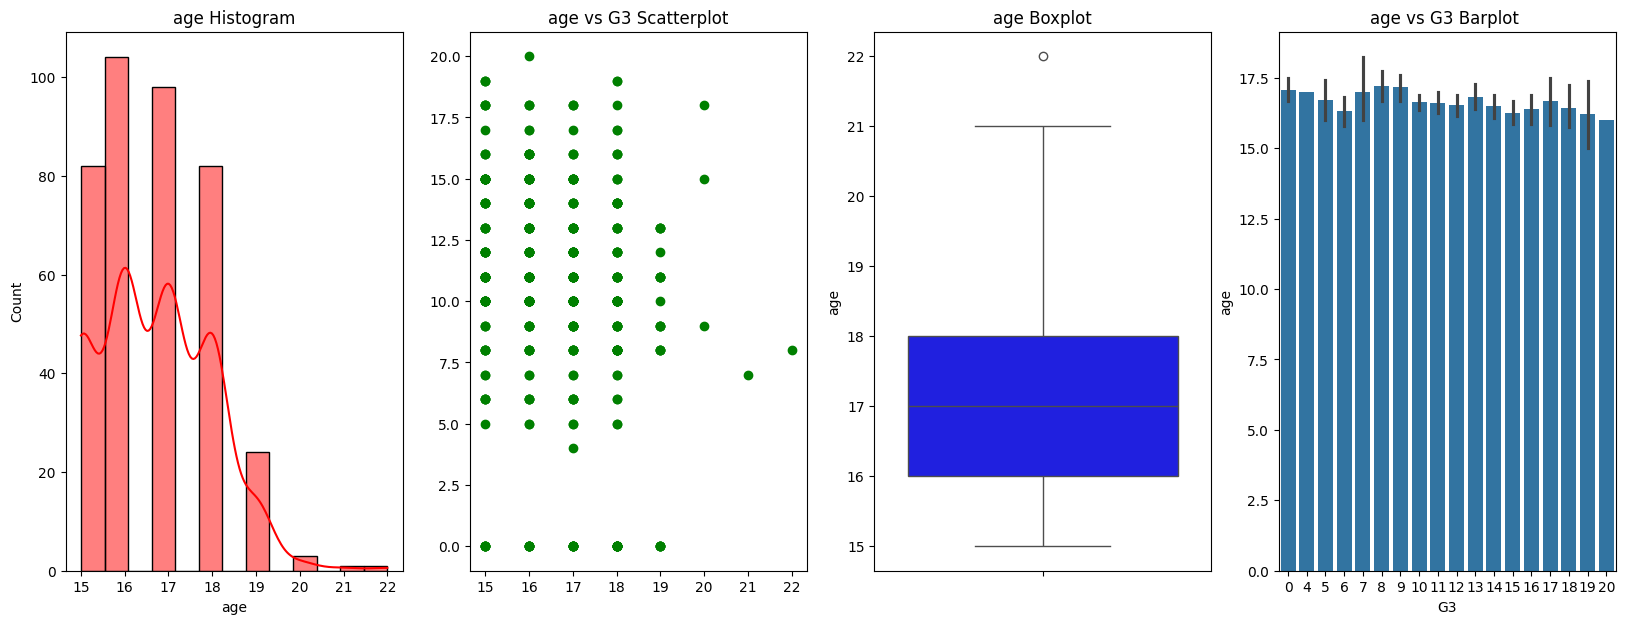

Medu


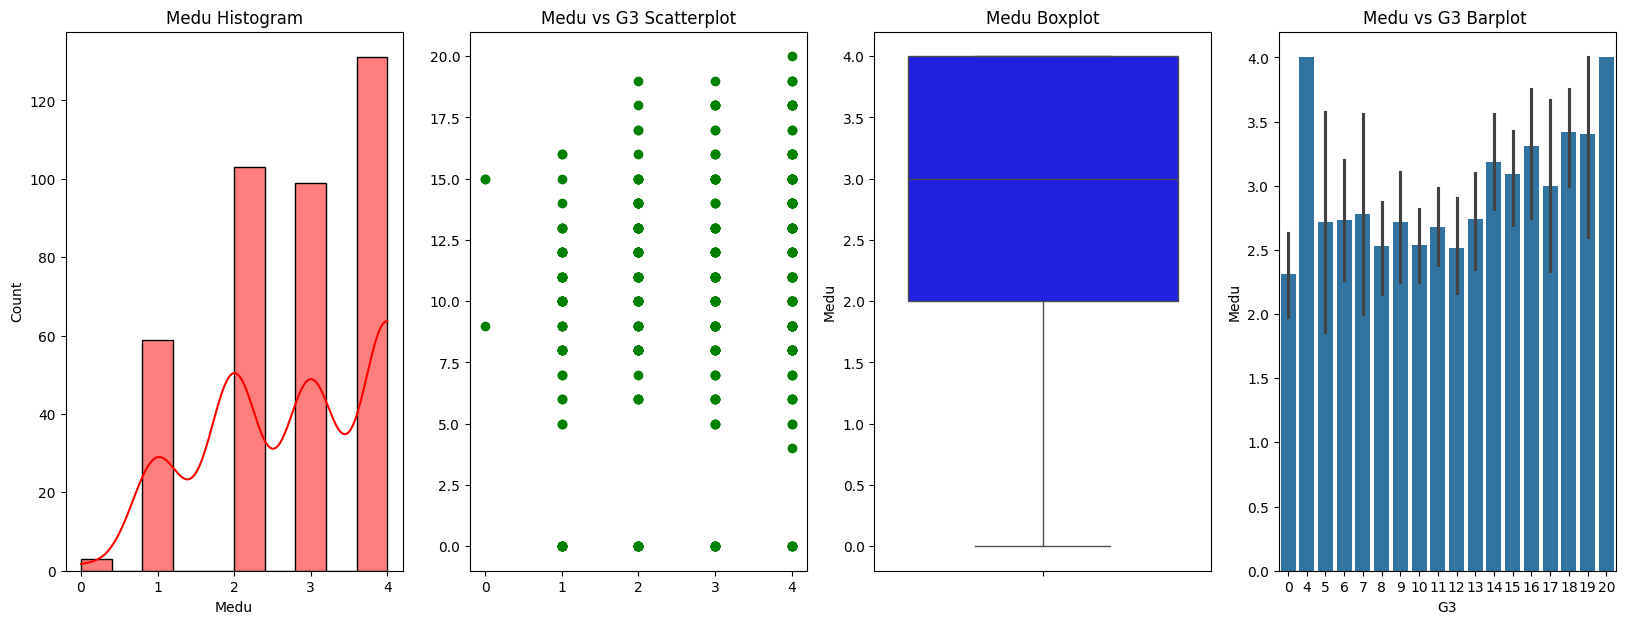

Fedu


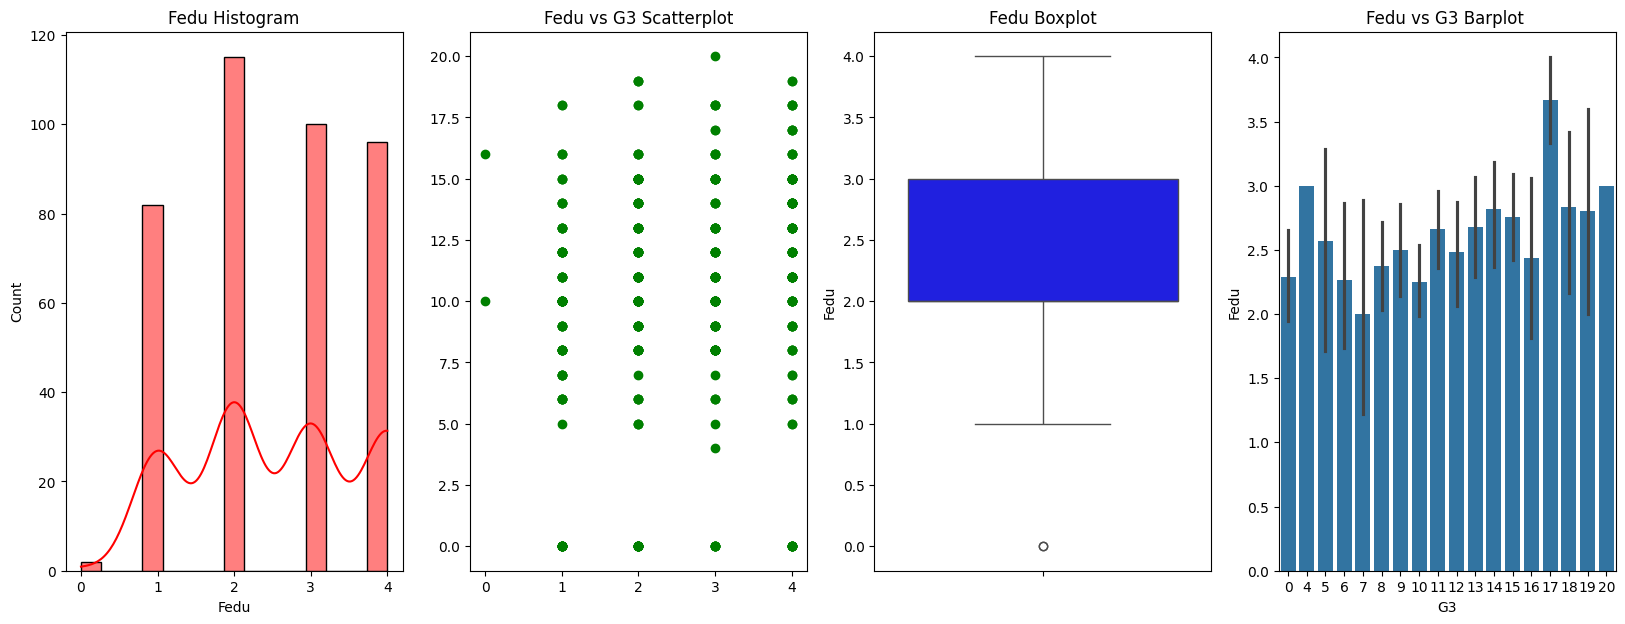

traveltime


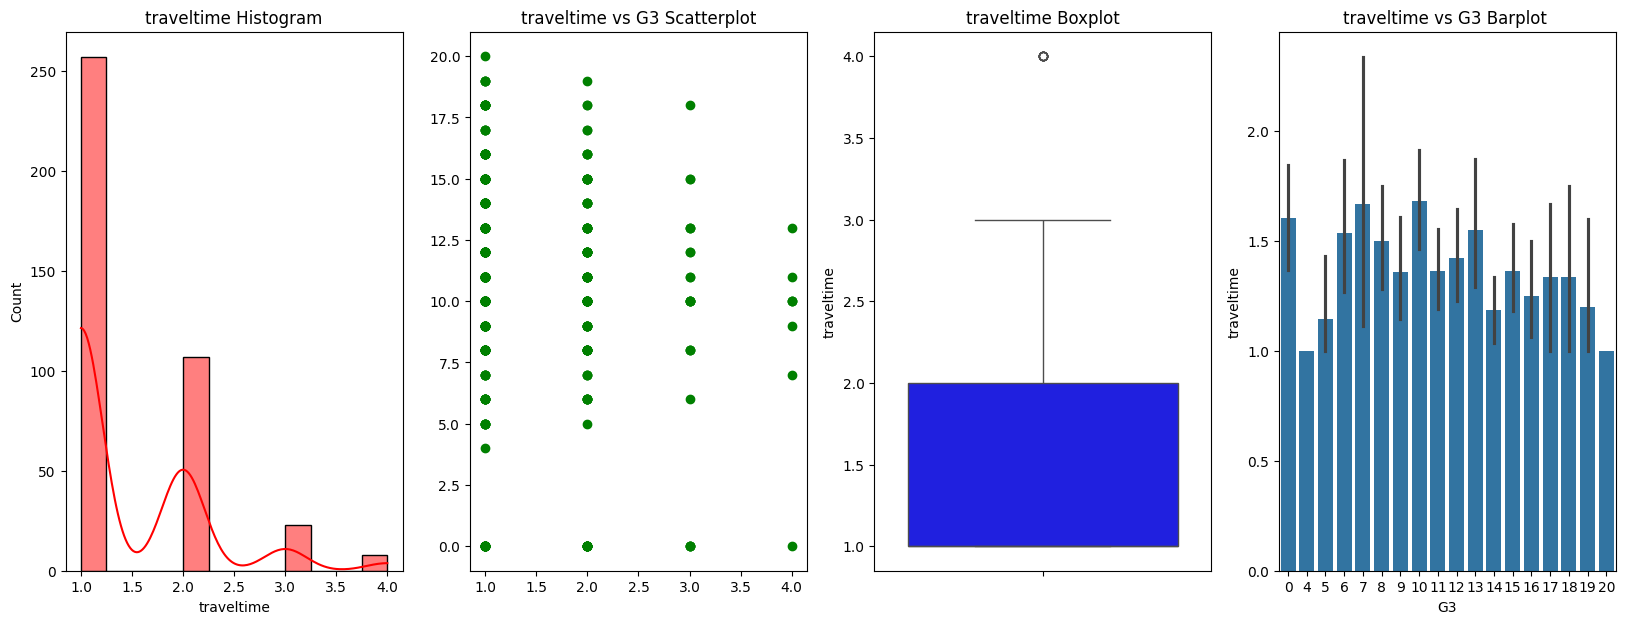

studytime


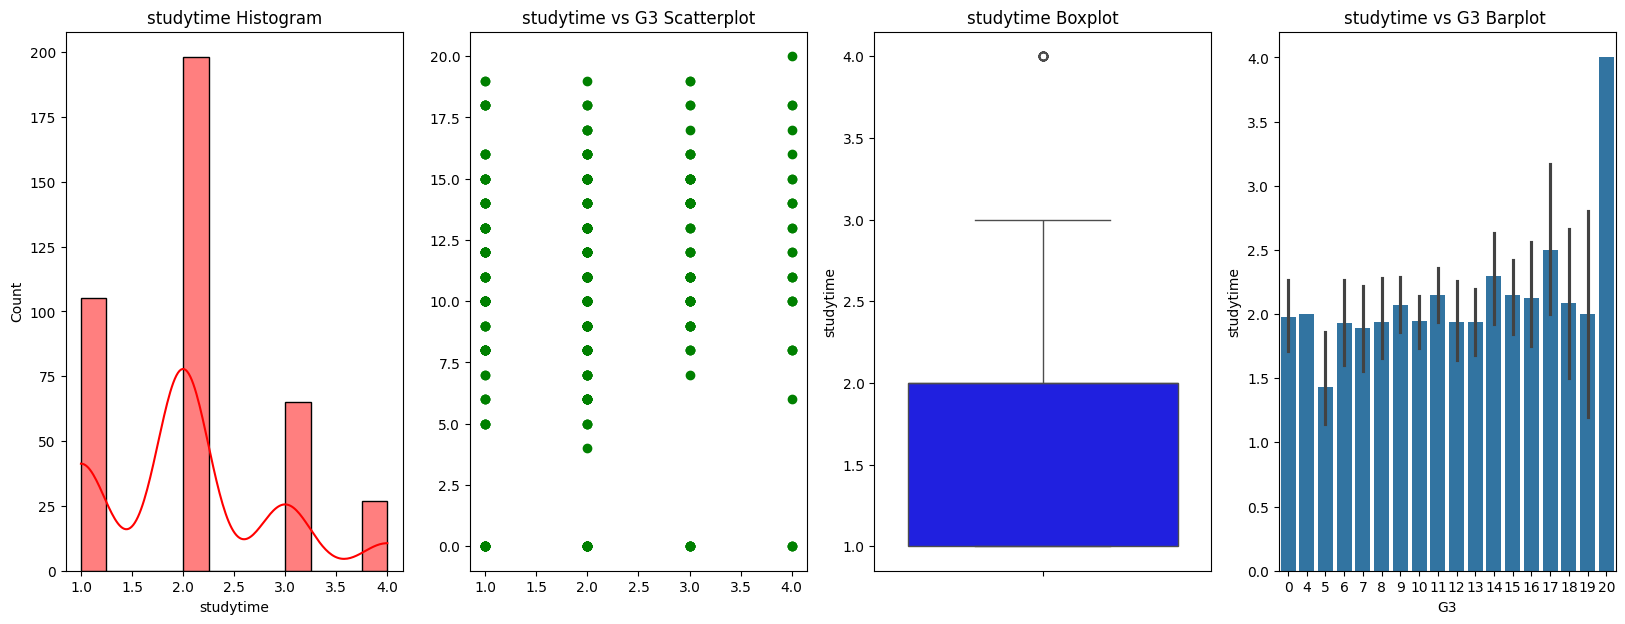

failures


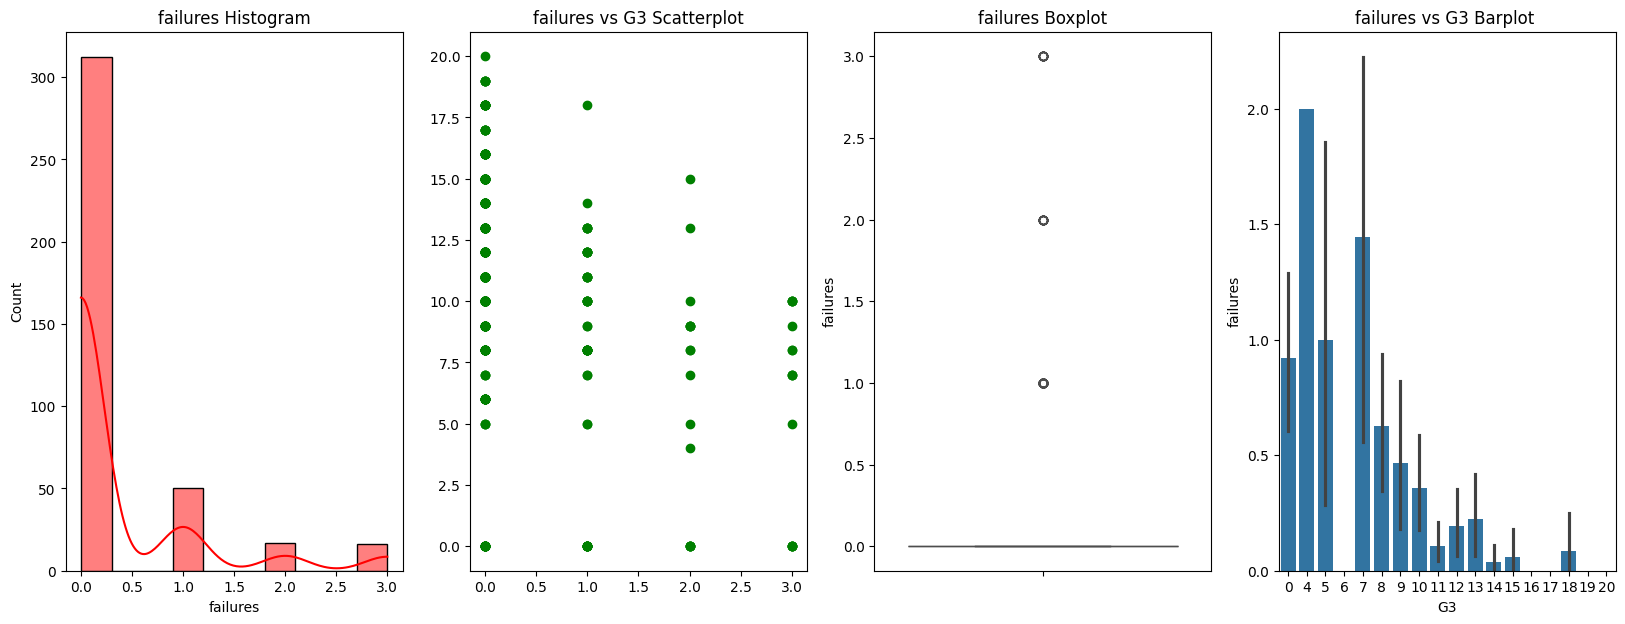

famrel


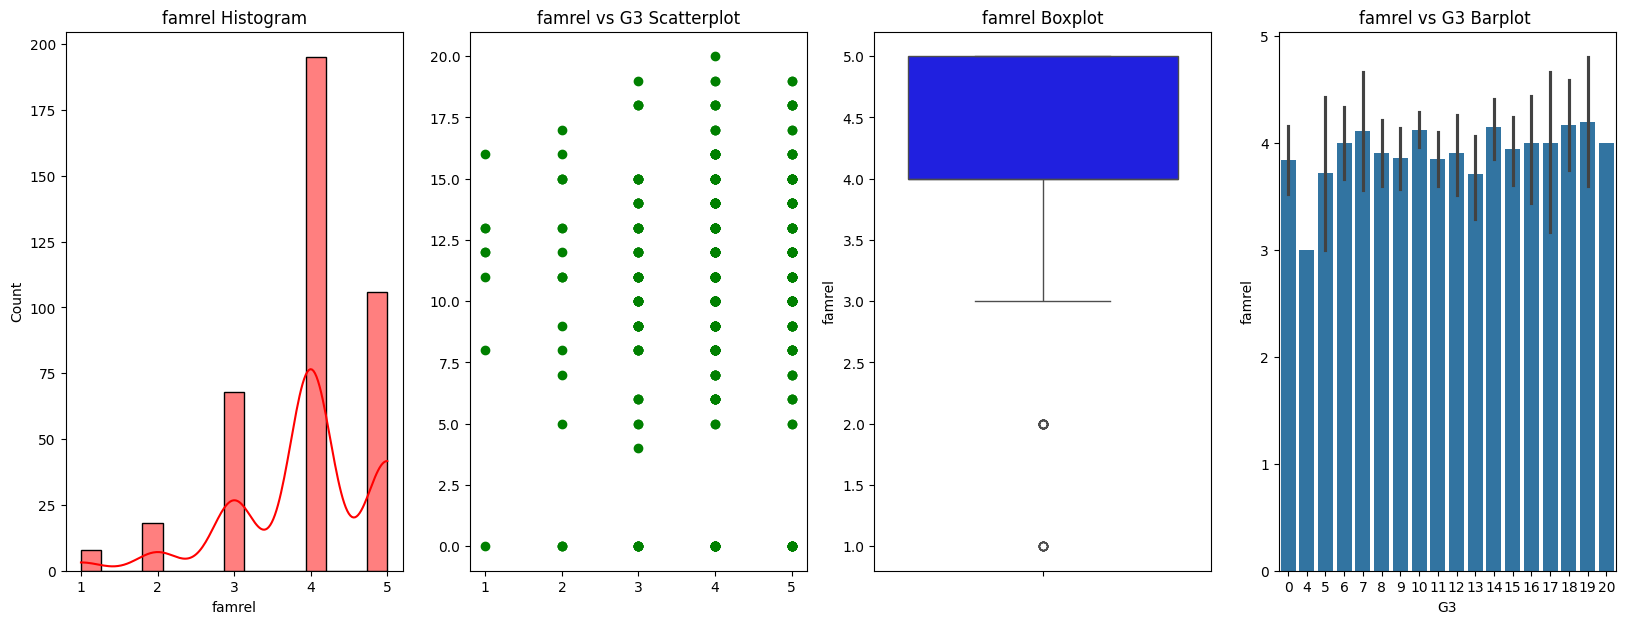

freetime


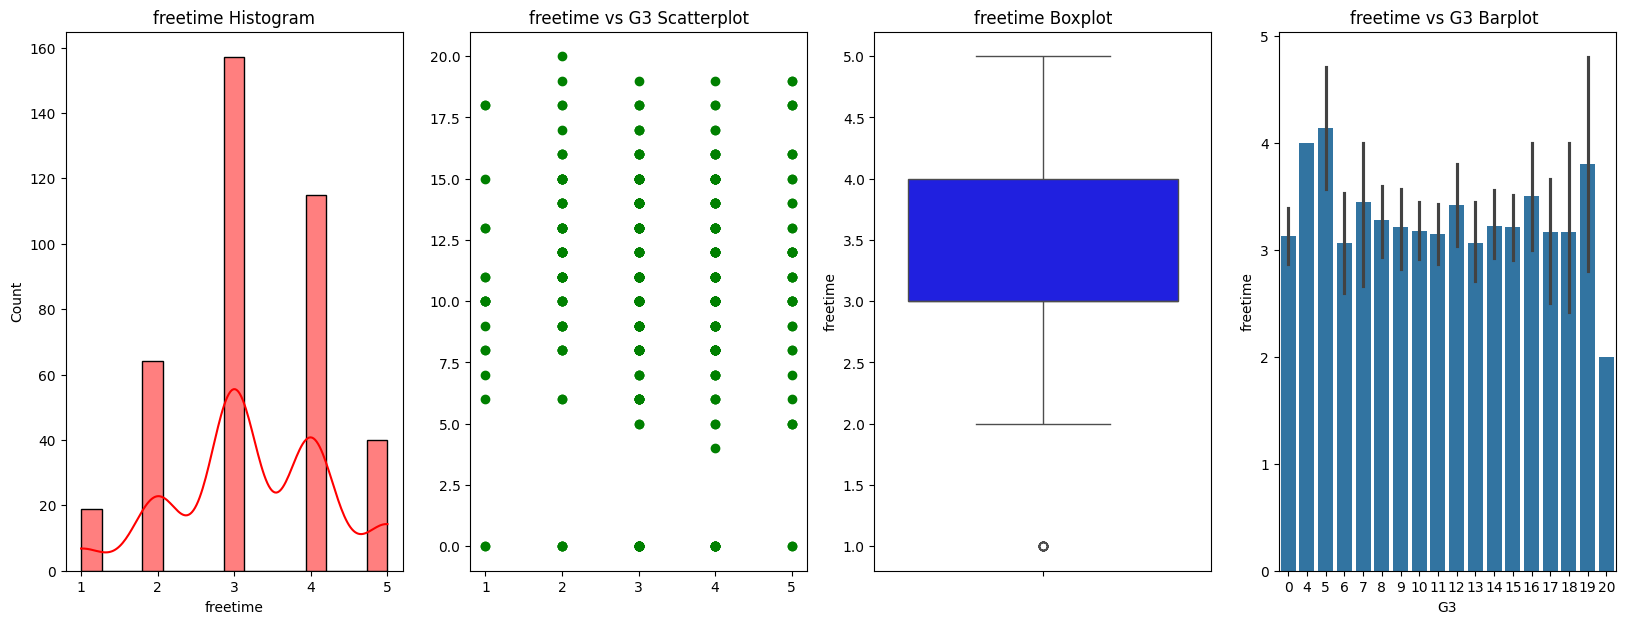

goout


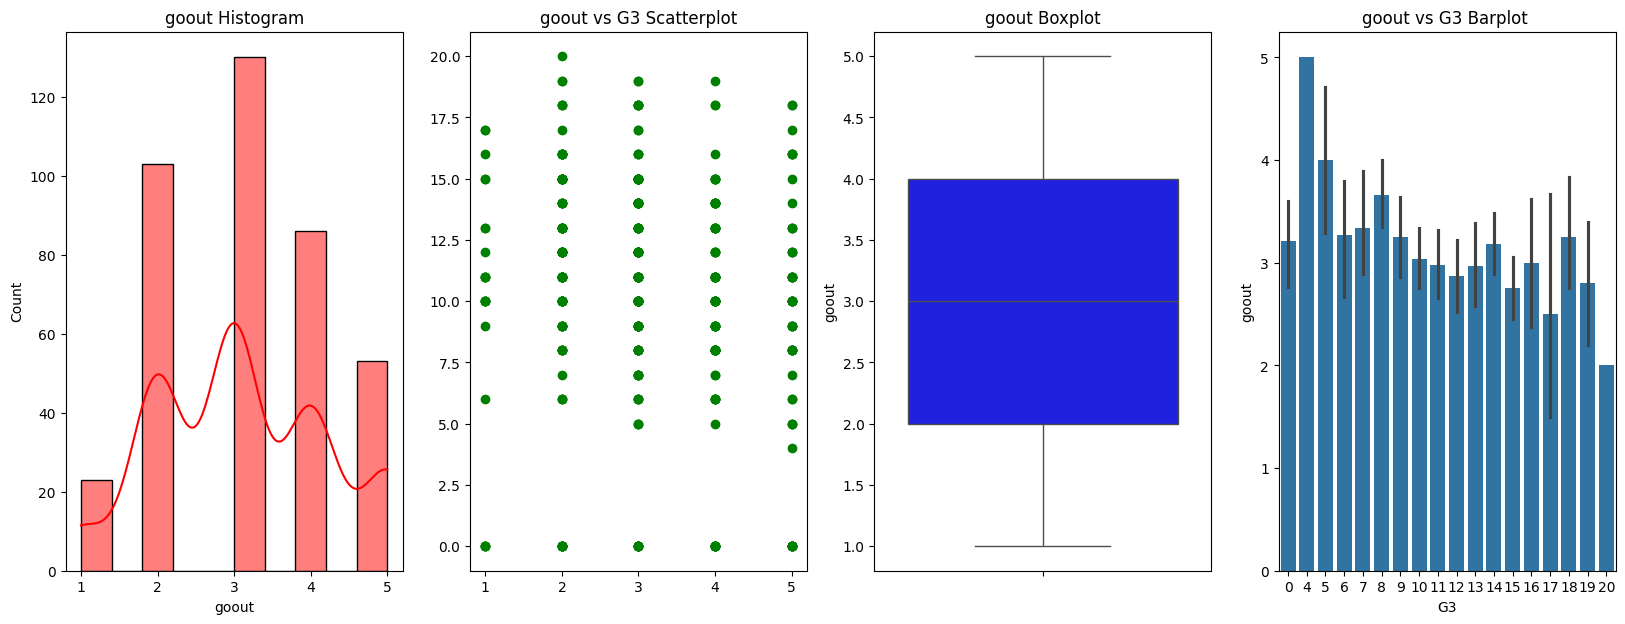

Dalc


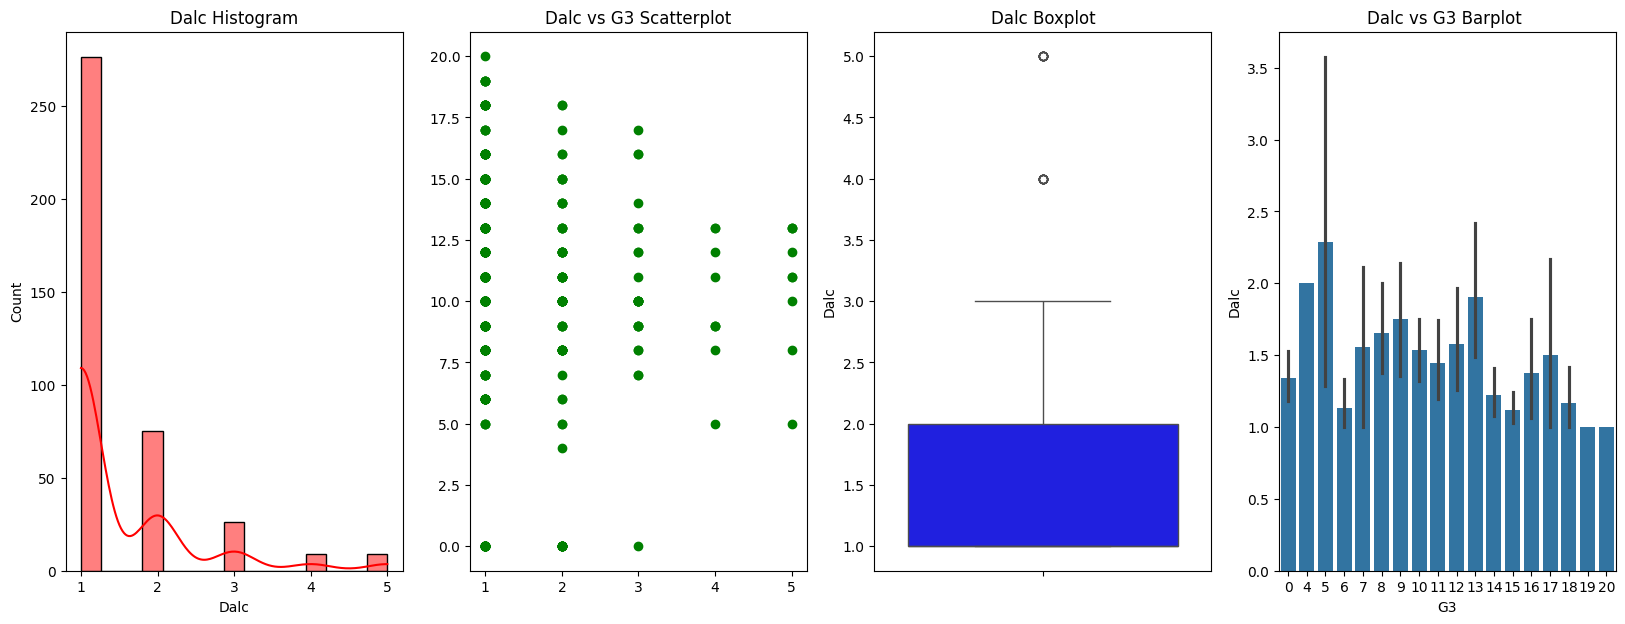

Walc


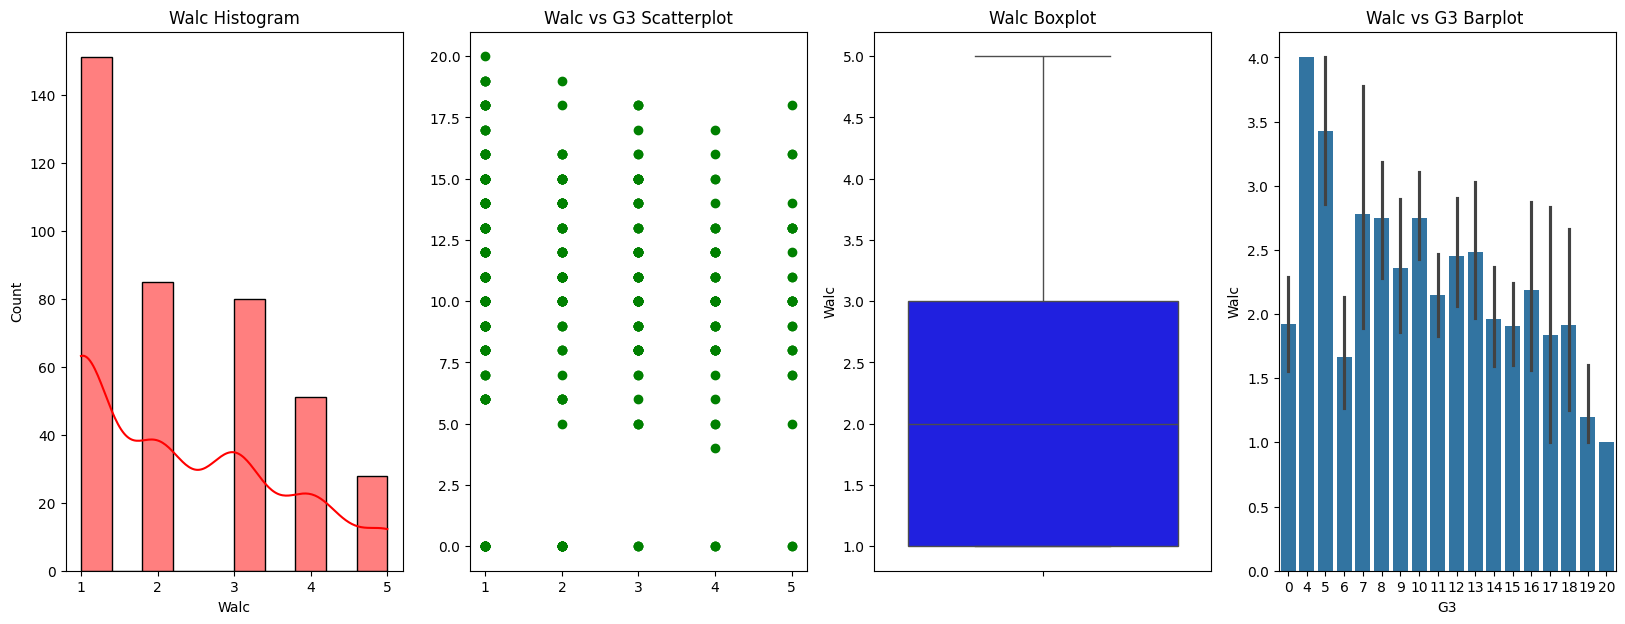

health


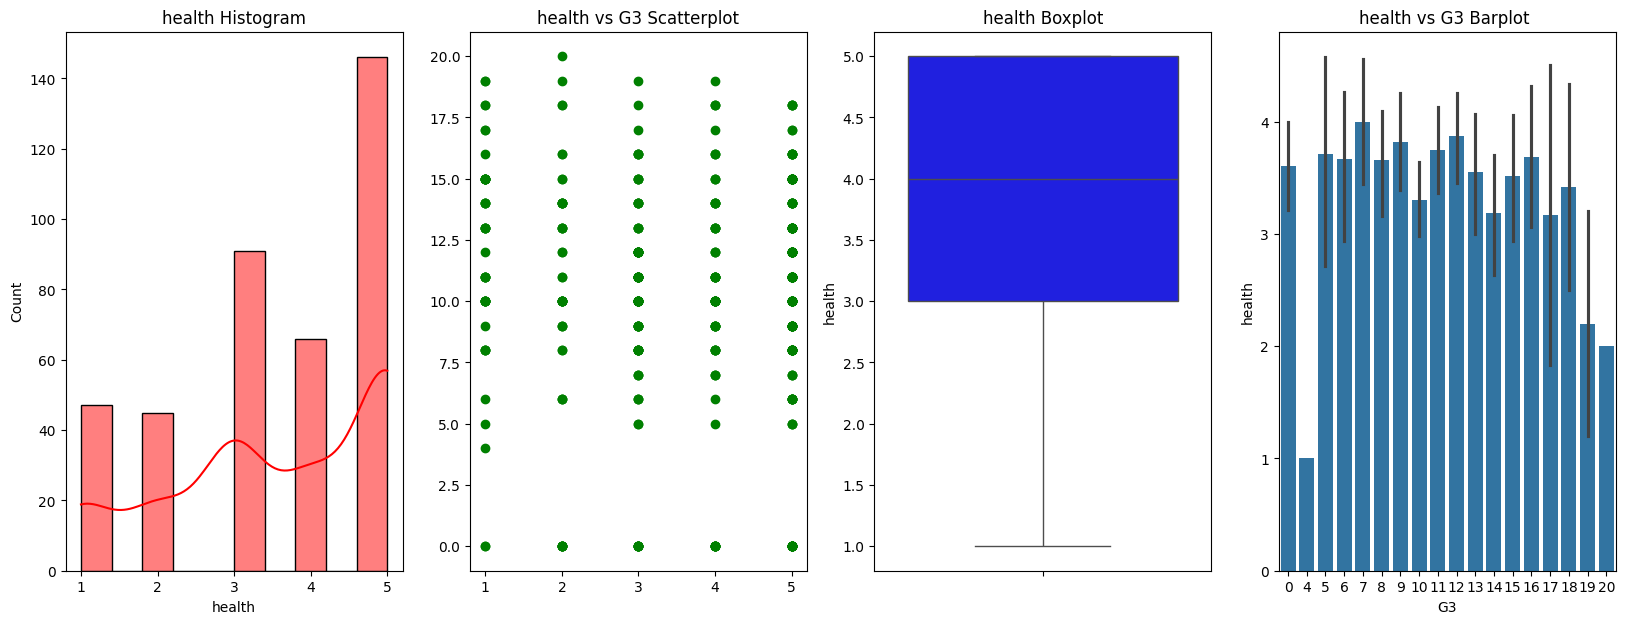

absences


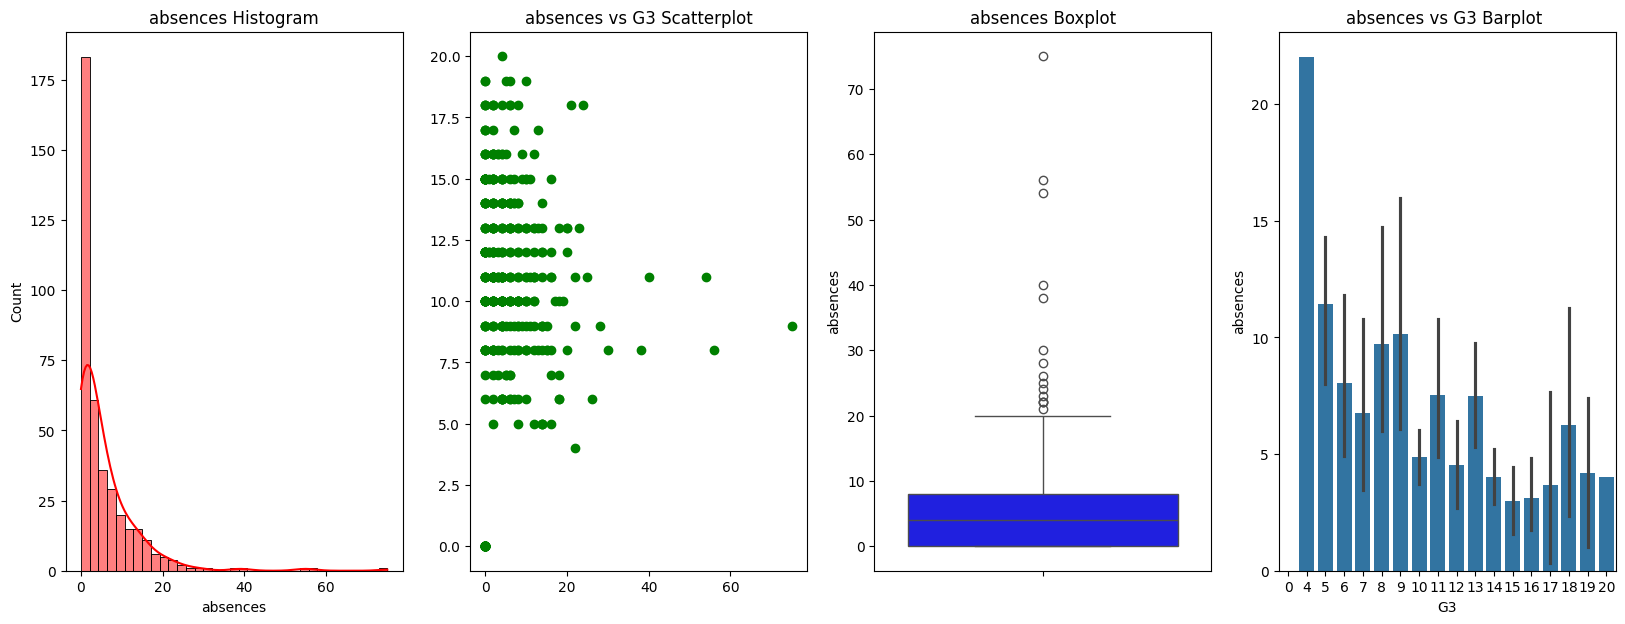

G1


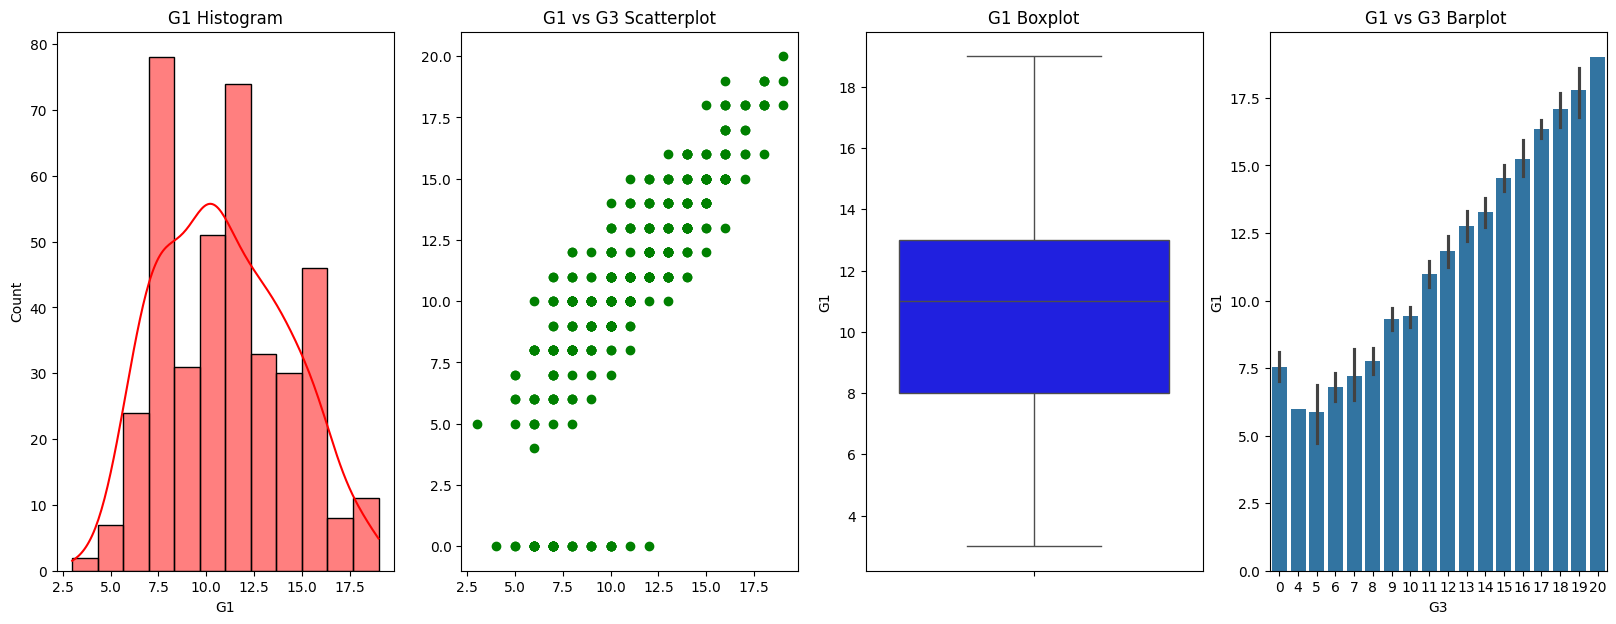

G2


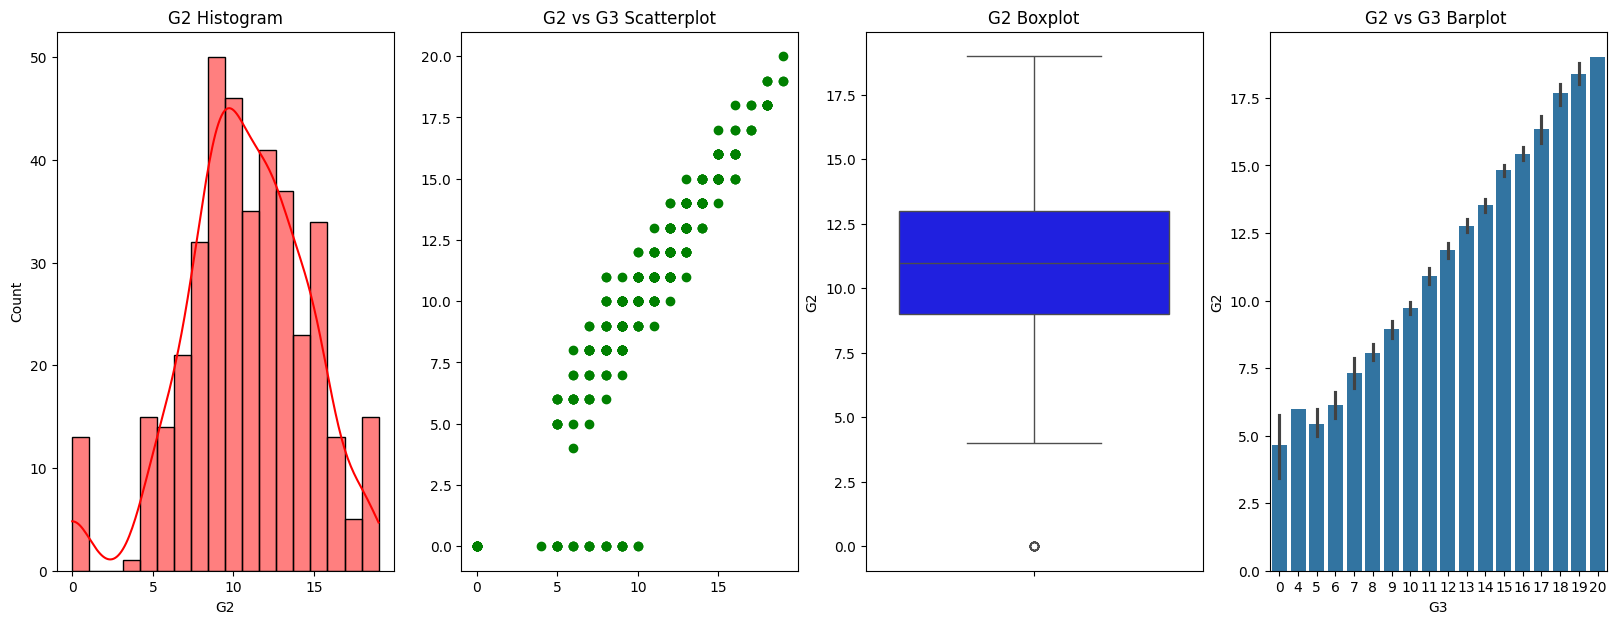

In [132]:
def diagnostic_plots(df, variable, target):
    # histogram
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde=True, color='r')
    plt.title(f'{variable} Histogram')

    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable], df[target], color='g')
    plt.title(f'{variable} vs {target} Scatterplot')

    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable], color='b')
    plt.title(f'{variable} Boxplot')

    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(data=df, x=target, y=variable)
    plt.title(f'{variable} vs {target} Barplot ')

    plt.show()

for col in data.select_dtypes(include=['int64']).columns[:-1]:
    print(col)
    diagnostic_plots(data, col, 'G3')

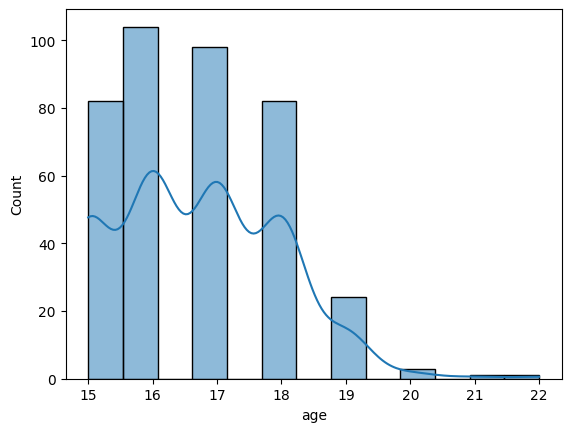

In [133]:
sns.histplot(x=data['age'], kde=True);
plt.savefig("age.png")

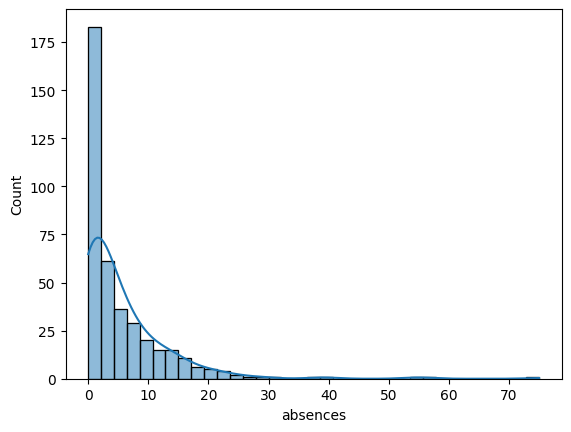

In [134]:
sns.histplot(x=data['absences'], kde=True);
plt.savefig("absence.png")

Text(0.5, 0.98, 'Exam scores')

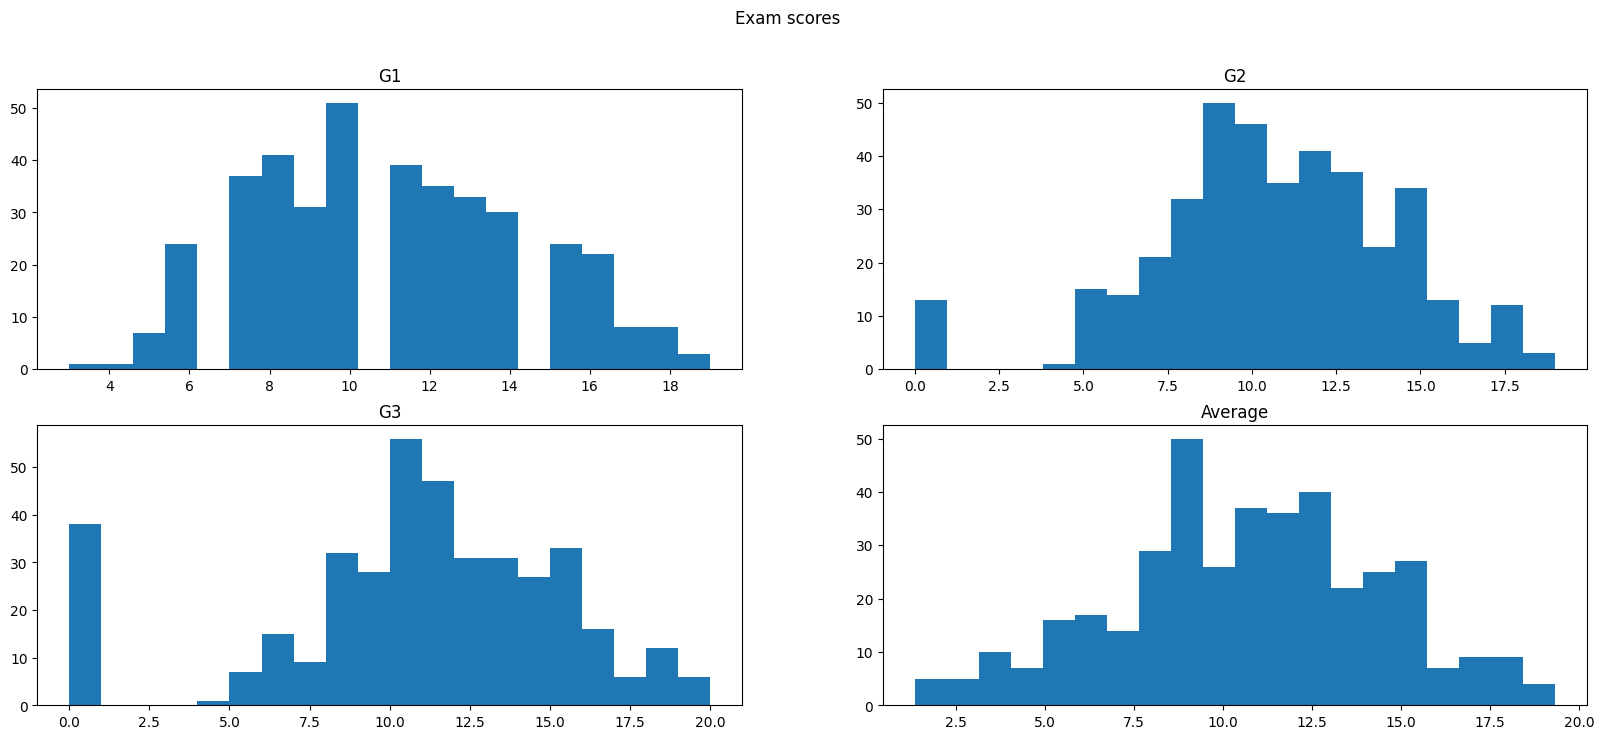

In [170]:
fig,axs = plt.subplots(2,2,figsize=(20,8))
#create histogram
axs[0][0].hist(data['G1'],bins=20)
axs[0][1].hist(data['G2'],bins=20)
axs[1][0].hist(data['G3'],bins=20)
axs[1][1].hist(data['Average'],bins=20)
#setting title
axs[0][0].set_title('G1')
axs[0][1].set_title('G2')
axs[1][0].set_title('G3')
axs[1][1].set_title('Average')
fig.suptitle("Exam scores")

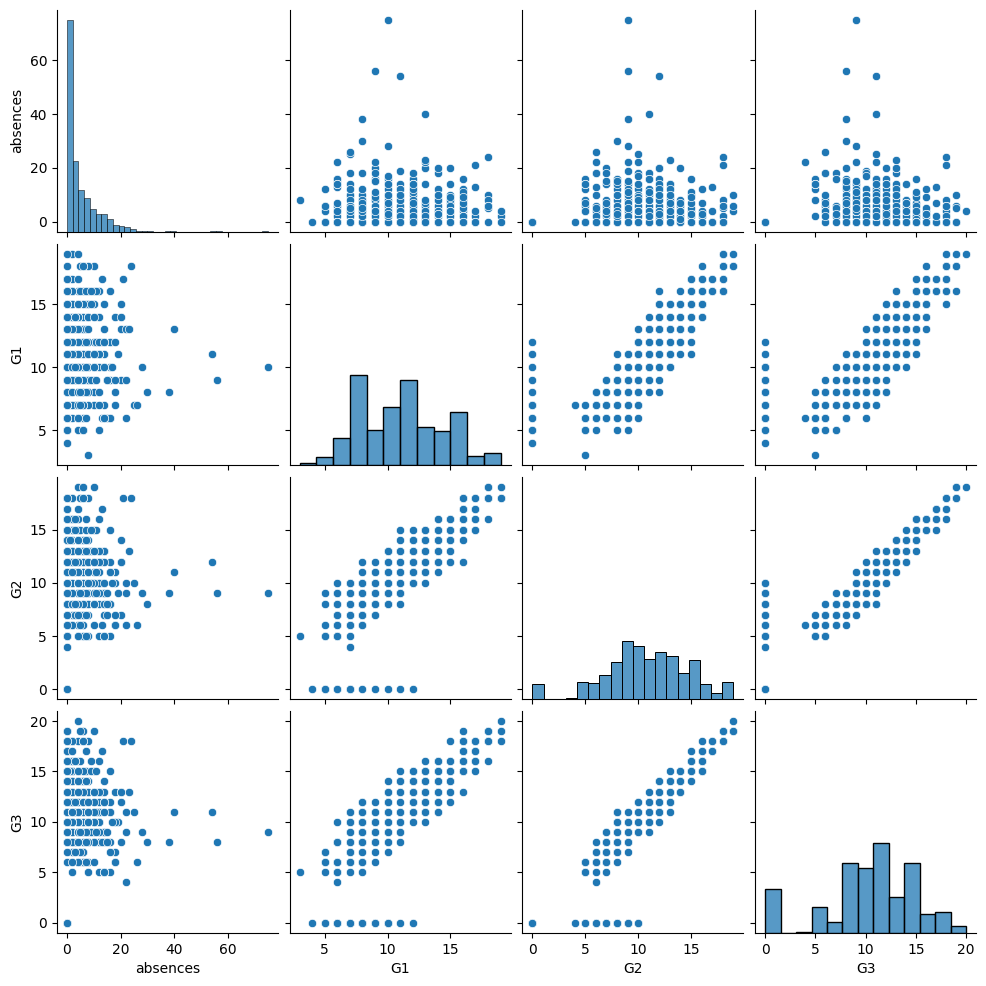

In [136]:
sns.pairplot(data.iloc[:,-4:])

**preprocessing**

**lable Encoding (Find and replace)**

In [137]:
for col in data.columns:
  if type(data[col][0]) is str:
    print(col,data[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


In [138]:
for col in data.columns:
  if data[col][0]=='yes' or data[col][0]=='no':
    data[col]=data[col].replace({'yes':'1','no':'0'},inplace=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


**Dummies Encoding**

In [139]:
for col in data.columns:
  if type(data[col][0]) is str:
    print(col,data[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']


In [ ]:
data.shape

In [ ]:
data.head()

In [140]:
data=pd.get_dummies(data)
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,1,...,False,False,True,True,False,False,False,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,False,True,False,False,False,True,False,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,False,False,True,False,False,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,False,True,False,False,False,True,False
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,False,True,False,False,True,False,False


In [ ]:
data.columns

In [169]:
data['Average']=(data['G1']+data['G2']+data['G3'])/3

In [142]:
data = data.drop(["G1", "G2", "G3"], axis=1)

**splitting**

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
train_df, test_df = train_test_split(data, train_size=.9, random_state=42)
train_df, dev_df = train_test_split(train_df, train_size=.9, random_state=42)

In [145]:
X_train = train_df.drop("Average", axis=1)
X_test = test_df.drop("Average", axis=1)
y_train = train_df["Average"]
y_test = test_df["Average"]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

**MLP**

In [146]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None, dtype=torch.float32):
        self.dataframe = dataframe
        self.transform = transform
        self.dtype = dtype

    def __len__(self):
        return len(self.dataframe)


    def __getitem__(self, idx):
      sample = self.dataframe.iloc[idx][:]
      features = sample.drop('Average').values
      target = sample['Average']

      # Check and convert data types
      if isinstance(features, np.ndarray) and features.dtype == object:
        features = features.astype(np.float32)
      if isinstance(target, np.ndarray) and target.dtype == object:
        target = target.astype(np.float32)

      features = torch.tensor(features, dtype=self.dtype)
      target = torch.tensor(target, dtype=self.dtype).unsqueeze(0)

      if self.transform:
        features = self.transform(features)

      return features, target


In [147]:
class Regressor(torch.nn.Module):
    def __init__(self, hidd1, hidd2, p1, p2, activation):
        super(Regressor, self).__init__()
        self.layer1 = torch.nn.Linear(40, hidd1)
        self.layer2 = torch.nn.Linear(hidd1, hidd2)
        self.layer3 = torch.nn.Linear(hidd2, 4)
        self.layer4 = torch.nn.Linear(4, 1)
        self.dropout1 = torch.nn.Dropout(p1)
        self.dropout2 = torch.nn.Dropout(p2)
        self.activation = activation

    def forward(self, x):
        #print("Input size:", x.size())  # Print the size of the input
        x = self.activation(self.layer1(x))
        x = self.dropout1(x)
        x = self.activation(self.layer2(x))
        x = self.dropout2(x)
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x


In [148]:
def train(dataloader, model, criterion, optimizer):
    model.train()
    total_loss = 0
    for X, y in dataloader:
        pred = model(X)
        loss = criterion(pred, y)
        total_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return total_loss/len(dataloader)

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test(dataloader, model):
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            mse = mean_squared_error(y, pred)
            mae = mean_absolute_error(y, pred)
            r2 = r2_score(y, pred)
    return mse, mae, r2

In [150]:
def run_epoch(train_dataloader, dev_dataloader, model, criterion, optimizer):
    # Check the data types of the inputs
    assert isinstance(train_dataloader, torch.utils.data.DataLoader), "train_dataloader must be a torch.utils.data.DataLoader"
    assert isinstance(dev_dataloader, torch.utils.data.DataLoader), "dev_dataloader must be a torch.utils.data.DataLoader"
    assert isinstance(model, torch.nn.Module), "model must be a torch.nn.Module"
    assert isinstance(criterion, torch.nn.modules.loss._Loss), "criterion must be a torch.nn.modules.loss._Loss"
    assert isinstance(optimizer, torch.optim.Optimizer), "optimizer must be a torch.optim.Optimizer"

    train_loss = train(train_dataloader, model, criterion, optimizer)
    test_loss, mae, r2 = test(dev_dataloader, model)
    return train_loss, test_loss, mae, r2


In [165]:
from tqdm import tqdm
import numpy as np

def run_regressor(model, criterion, optimizer, train_dataloader, dev_dataloader, nepochs=1000):
    # Check the data types of the inputs
    assert isinstance(train_dataloader, torch.utils.data.DataLoader), "train_dataloader must be a torch.utils.data.DataLoader"
    assert isinstance(dev_dataloader, torch.utils.data.DataLoader), "dev_dataloader must be a torch.utils.data.DataLoader"
    assert isinstance(nepochs, int), "nepochs must be an integer"

    train_losses, dev_losses, maes, r2s = [], [], [], []
    for _ in tqdm(range(nepochs)):
        train_loss, dev_loss, mae, r2 = run_epoch(train_dataloader, dev_dataloader, model, criterion, optimizer)
        train_losses.append(train_loss)
        dev_losses.append(dev_loss)
        maes.append(mae)
        r2s.append(r2)
    return train_losses, dev_losses, maes, r2s


In [155]:
def run_regressor_wrapper(params, train_dataloader, dev_dataloader, criterion):
    model = Regressor(*params)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    metrics = run_regressor(model, criterion, optimizer, train_dataloader, dev_dataloader)
    return metrics, params, model

In [156]:
torch.manual_seed(42)

train_dataset = CustomDataset(train_df)
dev_dataset = CustomDataset(dev_df)
test_dataset = CustomDataset(test_df)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=len(test_dataset), shuffle=False)
test_dataloader = DataLoader(dev_dataset, batch_size=len(test_dataset), shuffle=False)

criterion = torch.nn.MSELoss()

In [157]:
import matplotlib.pyplot as plt

def custom_plot(metrics):
    train_losses, dev_losses, maes, r2s = metrics

    train_range, dev_range = range(len(train_losses)), range(len(dev_losses))
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20), sharex=True)

    # Plotting Train and Dev Loss
    ax1.plot(train_range, train_losses, label='Train Loss')
    ax1.plot(dev_range, dev_losses, label='Dev Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.text(len(dev_losses)-1, dev_losses[-1], f'final dev loss {dev_losses[-1]:.4f}', ha='center', va='bottom', fontsize=10)
    ax1.legend()

    # Plotting Dev MAE
    ax2.plot(dev_range, maes, color='orange', label="Dev MAE")
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAE')
    ax2.text(len(maes)-1, maes[-1], f'final MAE {maes[-1]:.4f}', ha='center', va='bottom', fontsize=10)
    ax2.legend()

    # Plotting Dev R2 Score
    ax3.plot(dev_range, r2s, color='green', label="Dev R2")
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('R2 Score')
    ax3.text(len(r2s)-1, r2s[-1], f'final R2 score {r2s[-1]:.4f}', ha='center', va='bottom', fontsize=10)
    ax3.legend()

    # Adding Title to the Figure
    fig.suptitle("Performance Metrics of the best MLP Model", fontsize=16, y=0.99)  # Title for the entire figure

    # Adjust layout to prevent overlap
    plt.tight_layout()

    return fig, (ax1, ax2, ax3)

In [ ]:
from itertools import product
from joblib import Parallel, delayed

if __name__ == "__main__":
    param_grid = {
      'hidd1': [16, 32, 64],
      'hidd2': [8, 16, 32],
      'p1': [0, 0.1, 0.25, 0.5],
      'p2': [0, 0.1, 0.25, 0.5],
      'activation': [torch.nn.ReLU(), torch.nn.Tanh(), torch.nn.Sigmoid()]
    }
    all_params = list(product(*param_grid.values()))
    best_loss = float('inf')
    best_metrics = None
    best_params = None
    best_model = None
    criterion = torch.nn.MSELoss()
    with Parallel(n_jobs=-1) as parallel:
        results = parallel(delayed(run_regressor_wrapper)(params, train_dataloader, dev_dataloader, criterion) for params in all_params)
        for metrics, params, model in results:
            dev_loss = metrics[1][-1]
            if dev_loss < best_loss:
                best_loss = dev_loss
                best_metrics = metrics
                best_params = params
                best_model = model

    print("Best dev loss:", best_loss)
    print("Best parameters:", best_params)


In [ ]:
import torch
from itertools import product
from joblib import Parallel, delayed
from multiprocessing import Pool


def main():
    # Initialize your data loaders (train_dataloader and dev_dataloader)
    # Define other necessary variables (criterion, best_params, etc.)

    # Create a list of all parameter combinations
    param_grid = {
        'hidd1': [16, 32, 64],
        'hidd2': [8, 16, 32],
        'p1': [0, 0.1, 0.25, 0.5],
        'p2': [0, 0.1, 0.25, 0.5],
        'activation': [torch.nn.ReLU(), torch.nn.Tanh(), torch.nn.Sigmoid()]
    }
    all_params = list(product(*param_grid.values()))

    # Initialize a multiprocessing pool
    num_processes = 4  # Adjust based on your system capabilities
    with Pool(num_processes) as pool:
        results = pool.starmap(run_regressor_wrapper, [(params, train_dataloader, dev_dataloader, criterion) for params in all_params])

    # Find the best model based on dev loss
    best_loss = float('inf')
    best_metrics = None
    best_params = None
    best_model = None
    for metrics, params, model in results:
        dev_loss = metrics[1][-1]
        if dev_loss < best_loss:
            best_loss = dev_loss
            best_metrics = metrics
            best_params = params
            best_model = model

    print("Best dev loss:", best_loss)
    print("Best parameters:", best_params)
    custom_plot(best_metrics)
    test_mse, test_mae, test_r2 = test(test_dataloader, best_model)
    compare_df = {}
    compare_df["MLP"] = {'MSE': test_mse, 'MAE': test_mae, 'R2': test_r2}
    print(f'Test MSE : {test_mse}, Test MAE : {test_mae} and Test R2 score : {test_r2}')

if __name__ == "__main__":
    main()


In [ ]:
axs = custom_plot(best_metrics)
plt.savefig('perforamnce metrics of the best MLP model.png');
plt.show();

100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


Best dev loss: 15.372025
Best parameters: (16, 8, 0.1, 0.1, ReLU())
Test MSE : 15.372024536132812, Test MAE : 3.23433780670166 and Test R2 score : -0.04988463100734708


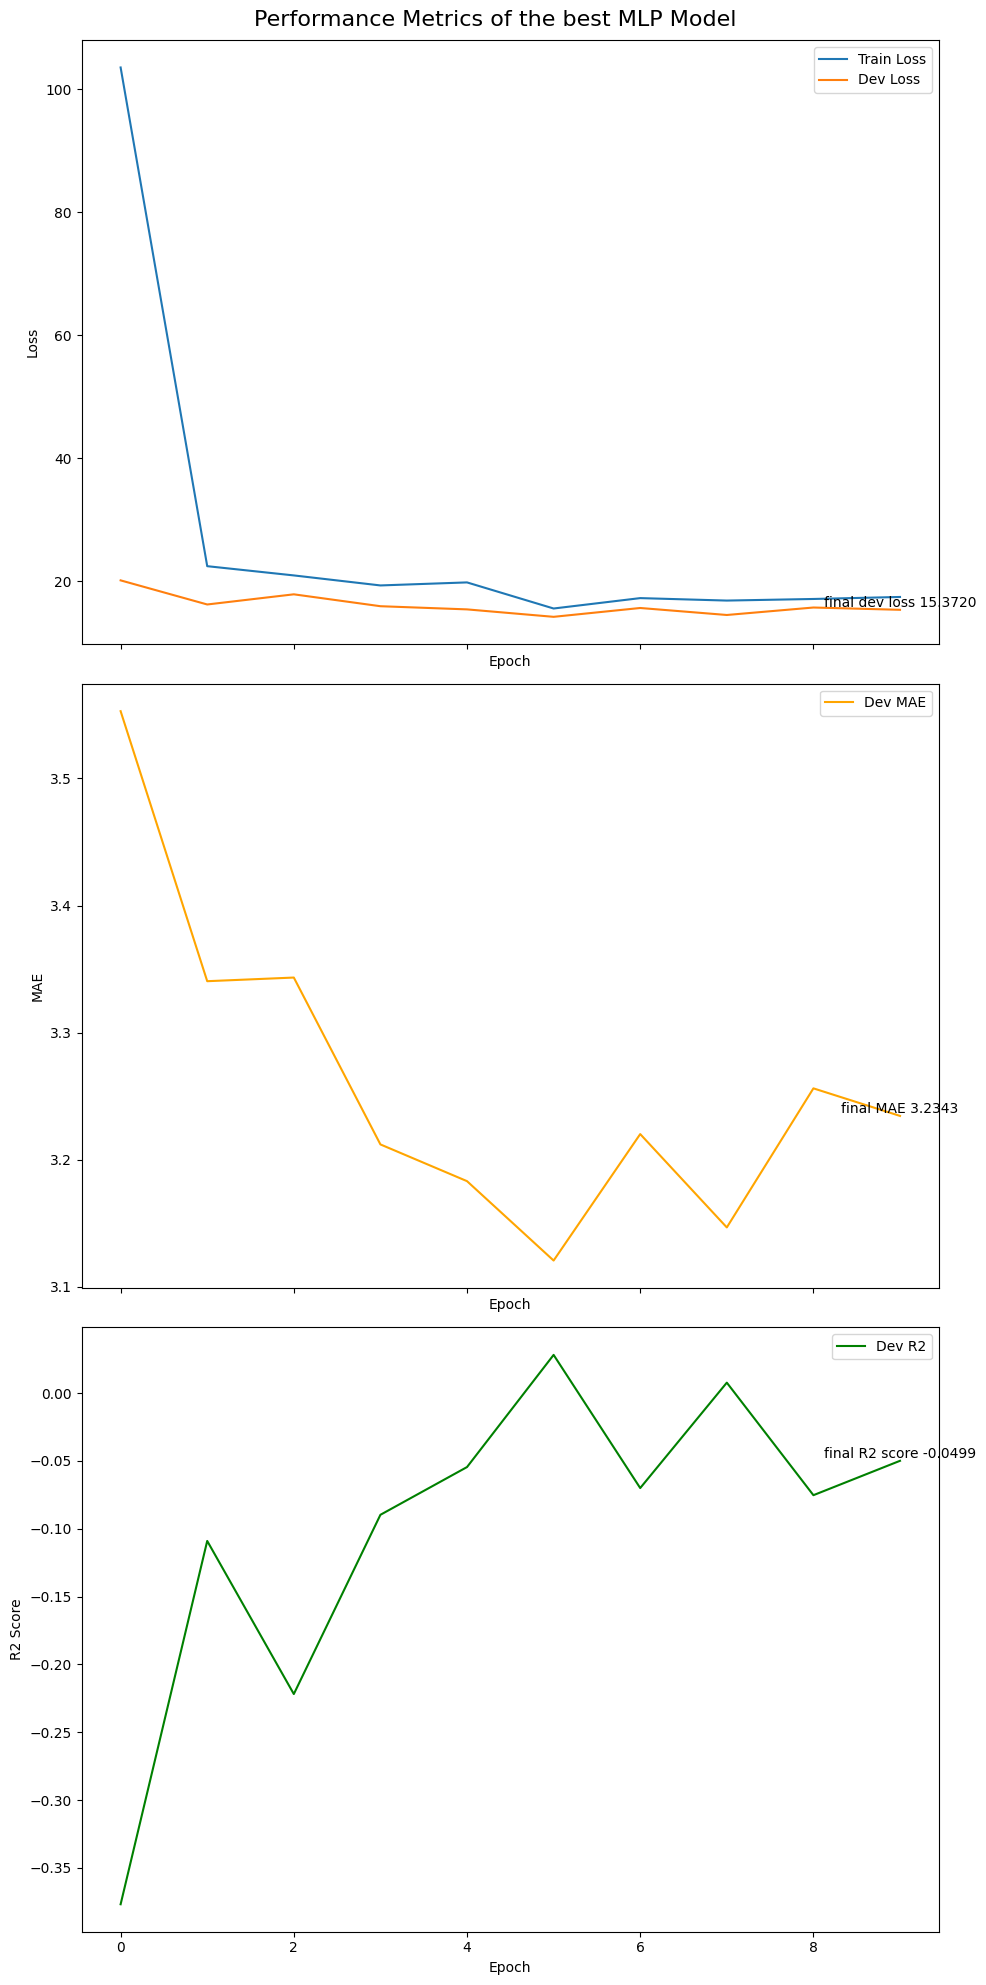

In [158]:
import torch
from itertools import product
from joblib import Parallel, delayed
from multiprocessing import Pool

def main():
    # Initialize your data loaders (train_dataloader and dev_dataloader)
    # Define other necessary variables (criterion, best_params, etc.)

    # Create a smaller parameter grid
    param_grid = {
        'hidd1': [16],
        'hidd2': [8],
        'p1': [0.1],
        'p2': [0.1],
        'activation': [torch.nn.ReLU(), torch.nn.Tanh(), torch.nn.Sigmoid()]
    }
    all_params = list(product(*param_grid.values()))

    # Initialize a multiprocessing pool with 2 processes
    num_processes = 2
    with Pool(num_processes) as pool:
        results = pool.starmap(run_regressor_wrapper, [(params, train_dataloader, dev_dataloader, criterion) for params in all_params])

    # Find the best model based on dev loss
    best_loss = float('inf')
    best_metrics = None
    best_params = None
    best_model = None
    for metrics, params, model in results:
        dev_loss = metrics[1][-1]
        if dev_loss < best_loss:
            best_loss = dev_loss
            best_metrics = metrics
            best_params = params
            best_model = model

    print("Best dev loss:", best_loss)
    print("Best parameters:", best_params)
    custom_plot(best_metrics)
    test_mse, test_mae, test_r2 = test(test_dataloader, best_model)
    compare_df = {}
    compare_df["MLP"] = {'MSE': test_mse, 'MAE': test_mae, 'R2': test_r2}
    print(f'Test MSE : {test_mse}, Test MAE : {test_mae} and Test R2 score : {test_r2}')

if __name__ == "__main__":
    main()


100%|██████████| 1000/1000 [12:21<00:00,  1.35it/s]


Parameters: (32, 16, 0.1, 0.1, ReLU())
Train Loss: [62.382084179494996, 16.35771438353695, 15.841973219282227, 16.036522743059322, 14.890413735015319, 13.78401572597213, 13.577965366095304, 14.541812815051525, 12.553274958766997, 14.052527408348396, 12.36660368971061, 12.593081536563114, 13.427181185781956, 12.216305696801282, 11.897972845565528, 11.896498467773199, 11.930999134213199, 11.046150532690808, 12.287463807457243, 11.542709860205651, 11.387139551667497, 11.725396156962962, 11.493309103813953, 10.850273058377207, 12.314252973534167, 11.646904690601513, 11.766284072597045, 11.351341506652535, 11.333553605899215, 11.925055400282144, 12.284065056778491, 10.015270564239472, 10.297511239815503, 10.69928847933188, 10.514854549476876, 11.280155643774197, 10.647371364029823, 10.627407881151886, 11.249102480895818, 10.840915088960902, 10.898045236151665, 10.808971130568533, 10.64549953052774, 10.64619454210624, 10.028894550632685, 9.616279995557852, 10.357403133343904, 10.312350634875

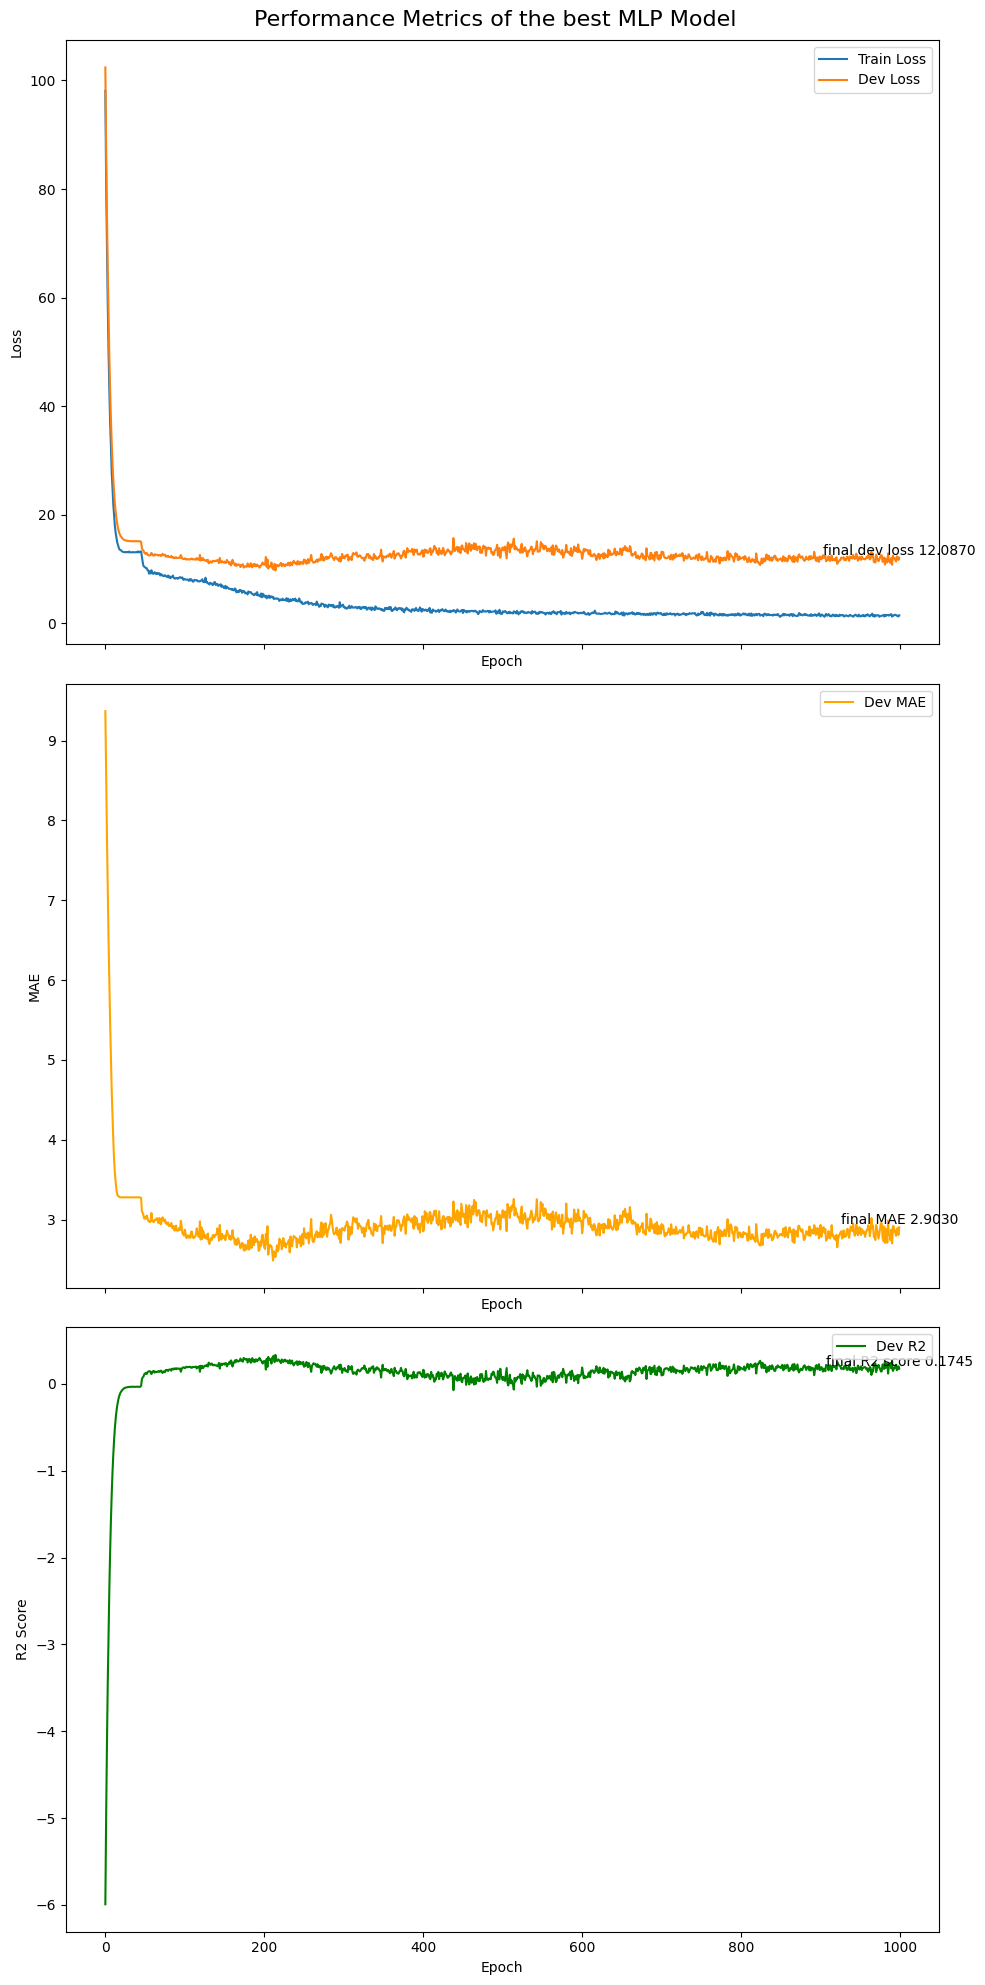

In [166]:
def main():
    # Initialize your data loaders (train_dataloader and dev_dataloader)
    # Define other necessary variables (criterion, best_params, etc.)

    # Create a smaller parameter grid
    param_grid = {
        'hidd1': [32],
        'hidd2': [16],
        'p1': [0.1],
        'p2': [0.1],
        'activation': [torch.nn.ReLU(), torch.nn.Tanh(), torch.nn.Sigmoid()]
    }
    all_params = list(product(*param_grid.values()))

    # Initialize a multiprocessing pool with 2 processes
    num_processes = 2
    with Pool(num_processes) as pool:
        results = pool.starmap(run_regressor_wrapper, [(params, train_dataloader, dev_dataloader, criterion) for params in all_params])

    for metrics, params, model in results:
        train_loss, mse, mae, r2 = metrics
        print(f"Parameters: {params}")
        print(f"Train Loss: {train_loss}")
        #print(f"Dev Loss: {dev_loss}")
        print(f"MSE: {mse}")
        print(f"MAE: {mae}")
        print(f"R2: {r2}")

    # Find the best model based on dev loss
    best_loss = float('inf')
    best_metrics = None
    best_params = None
    best_model = None
    for metrics, params, model in results:
        dev_loss = metrics[1][-1]
        if dev_loss < best_loss:
            best_loss = dev_loss
            best_metrics = metrics
            best_params = params
            best_model = model
            #print("NBest dev loss:", best_loss)
            #print("NBest parameters:", best_params)

    print("Best dev loss:", best_loss)
    print("Best parameters:", best_params)
    custom_plot(best_metrics)
    test_mse, test_mae, test_r2 = test(test_dataloader, best_model)
    compare_df = {}
    compare_df["MLP"] = {'MSE': test_mse, 'MAE': test_mae, 'R2': test_r2}
    print(f'Test MSE : {test_mse}, Test MAE : {test_mae} and Test R2 score : {test_r2}')

if __name__ == "__main__":
    main()


In [ ]:
# Assuming you have predictions and ground truth (y_true) for the test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE
test_mse = mean_squared_error(y_true, predictions)

# Calculate MAE
test_mae = mean_absolute_error(y_true, predictions)

# Calculate R2 score
test_r2 = r2_score(y_true, predictions)

# Store the results in a dictionary or any other data structure
compare_df = {}
compare_df["MLP"] = {'MSE': test_mse, 'MAE': test_mae, 'R2': test_r2}

print(f'Test MSE: {test_mse:.2f}, Test MAE: {test_mae:.2f}, Test R2 score: {test_r2:.2f}')
